# Model Training

### scikit - learn

https://scikit-learn.org/stable/

scikitlearn (sklearn) provides simple and efficient tools for predictive data analysis. It is built on NumPy, SciPy, and matplotlib. 

First thing, Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# next load the data
df = pd.read_csv('final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,1


In [3]:
df.shape

(1863, 14)

## Linear Regression Model

In [4]:
# import linear regression model

from sklearn.linear_model import LinearRegression

In [7]:
# seperate input features in x
x=df.drop('price', axis=1)

# store the target variable in y
y = df['price']

**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [13]:
# import module train test split
from sklearn.model_selection import train_test_split
# Split the dataset
train_test_split(x,y, stratify=df['property_type_Condo'], test_size=0.2)

[      year_sold  property_tax  insurance  beds  baths  sqft  year_built  \
 1429       1999           548        141     4      3  3798        1999   
 1786       2003           819        249     5      4  4607        1998   
 313        2004           233         71     2      2  1413        1980   
 987        2009           441        134     4      2  1323        1965   
 580        2011           428        142     3      2  1778        1994   
 ...         ...           ...        ...   ...    ...   ...         ...   
 1860       1999           942        287     5      6  7064        1995   
 839        2004           463        141     3      3  1986        2004   
 362        2008           247         63     3      1  1102        1984   
 58         2008           249         76     1      1   838        2007   
 983        2004           532        162     4      2  1276        1959   
 
       lot_size  basement  popular  recession  property_age  \
 1429      8276        

In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, stratify=df['property_type_Condo'], test_size=0.2)
xtrain.shape, ytrain.shape

((1490, 13), (1490,))

In [21]:
# create an object of the class

# train your model
lrmodel = LinearRegression().fit(xtrain,ytrain)

# make preditions on train set


In [17]:
# the coeff of each of the features
lrmodel.coef_

array([ 7.14755211e+03, -4.28929571e+02,  2.24731015e+03,  3.06432529e+03,
        6.51456768e+03,  2.97720235e+01,  3.99442656e+03,  1.76816730e-01,
       -1.03806482e+04, -6.53316915e+03, -4.44801971e+04,  3.15312555e+03,
       -2.13752021e+04])

In [ ]:
# evaluate your model
# we need mean absolute error

print('Train error is', train_mae)

In [18]:
# make predictions on test set
ypred = lrmodel.predict(xtest)
ypred
#evaluate the model
#print('Test error is', test_mae)

array([ 434423.92459898,  425574.68238084,  446249.3565121 ,
        404370.4544539 ,  372976.7534501 ,  378535.74689077,
        290034.72077234,  383744.79434854,  422102.57444701,
        441851.71041916,  604633.95416317,  540168.24047957,
        959979.23799172,  357727.84449809,  347573.05541249,
        343883.94063241,  467834.94384661,  465218.30167072,
        413717.68275272,  331949.03830938,  478882.00710521,
        456669.32756845,  372910.08689694,  421225.62242593,
        458109.64548889,  286684.77533353,  598400.10520894,
        346883.99806361,  470707.5211121 ,  456061.56432902,
        355905.64707596,  537532.64782769,  381802.06427023,
        320081.9623458 ,  373538.81453602,  444894.82407831,
        354297.2304667 ,  439581.82252311,  355938.59909921,
        603949.37037684,  348443.40960659,  343850.92723481,
        556764.15077333,  346724.93958003,  633097.30796031,
        453898.67011378,  354012.4690539 ,  402050.94544837,
        373278.16127659,

In [19]:
#evaluate your model
#we need mean abosolute error
from sklearn.metrics import mean_absolute_error

In [20]:
# make predictions on test set
test_mae = mean_absolute_error(ytest, ypred)
#evaluate the model
print('Test error is', test_mae)

Test error is 85029.25075414113


## Is your model good? What did the business ask?

<AxesSubplot:>

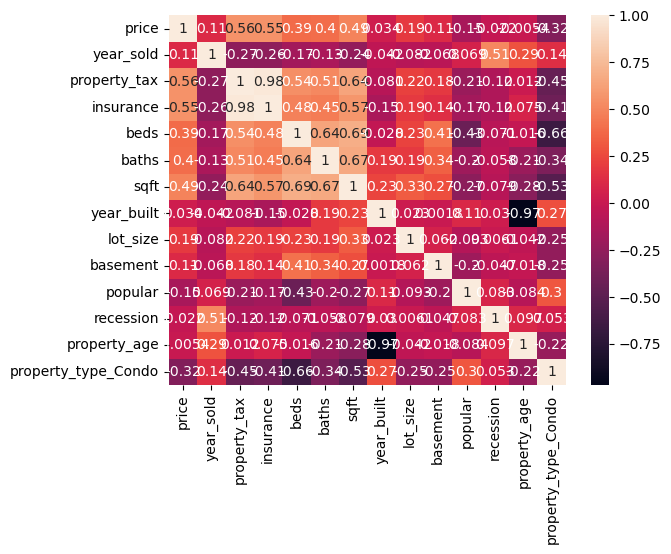

In [22]:
import seaborn as sn
corr=df.corr()
sn.heatmap(corr, annot=True )

## Random Forest

In [36]:
#import linea
from sklearn.tree import DecisionTreeRegressor
# create an instance of the model
dt= DecisionTreeRegressor(max_features=10)

In [37]:
#train the model
dtmodel= dt.fit(xtrain, ytrain)

In [38]:
# make predictions on the test set
dt_ypred = dtmodel.predict(xtest)

In [39]:
dt_test_mae= mean_absolute_error(ytest, dt_ypred)
dt_test_mae

62051.47184986595

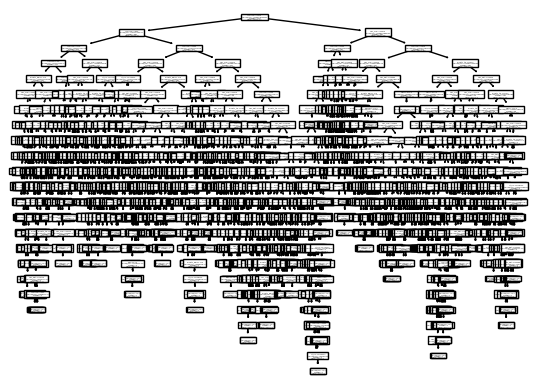

In [64]:
#plot the tree
from sklearn import tree
#plot the tree with feature names
tree.plot_tree(dtmodel, feature_names=dtmodel.feature_names_in_)
#tree. plot_tree (dtmodel)
#plt.show (dpi=300

plt.savefig('tree.png',dpi=300)

In [55]:
#import linear regression model
from sklearn.ensemble import RandomForestRegressor
#create an instance of the model
rf=RandomForestRegressor(n_estimators=50, criterion ='absolute_error')

#train model
rfmodel = rf.fit(xtrain, ytrain)
rf_ypred =rf.predict(xtest)
rf_test_mae= mean_absolute_error(rf_ypred, ytest)

rf_test_mae

47670.36217158177

In [62]:
import pickle
#save the model
pickle.dump(rfmodel, open('RF_MODEL', 'wb')) #saving it in binary form

In [63]:
#load model
Model = pickle.load(open('RF_MODEL', 'rb')) #importing the model

In [ ]:
moddel.predict([[2013,234,81,1,1,584,2013,0,0,0,1,0,1]])